Day 1: loading and inspecting the data
---

Previewing the first 5 rows and understanding features and checking for missing values and basic starts

In [99]:
#Load & inspect data
import pandas as pd

train = pd.read_csv('train.csv')
print("Shape of the data", train.shape)
print("\nColumn names", train.columns)

train.head()

Shape of the data (891, 11)

Column names Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
#Understanding the features
print(train.isnull().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


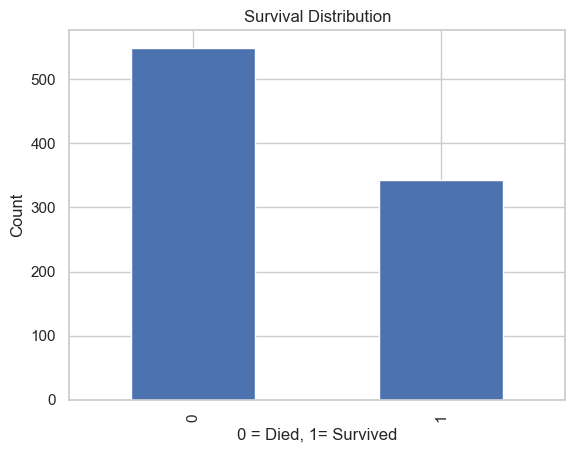

In [101]:
#Survived or Not plot
import matplotlib.pyplot as plt
train['survived'].value_counts().plot(kind='bar')
plt.title("Survival Distribution")
plt.xlabel("0 = Died, 1= Survived")
plt.ylabel("Count")
plt.show()

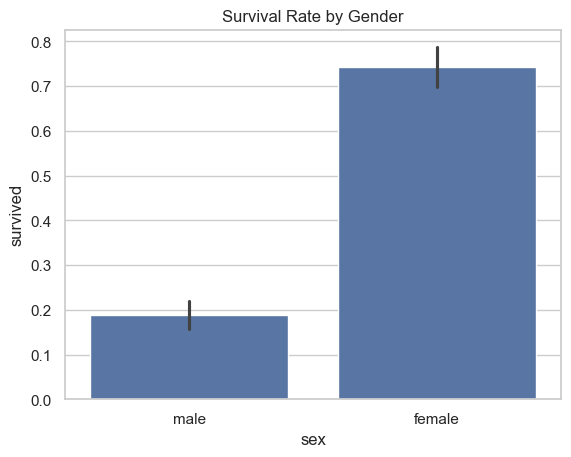

In [102]:
#Gender based Survival
import seaborn as sns

sns.barplot(x='sex', y='survived', data=train)
plt.title("Survival Rate by Gender")
plt.show()

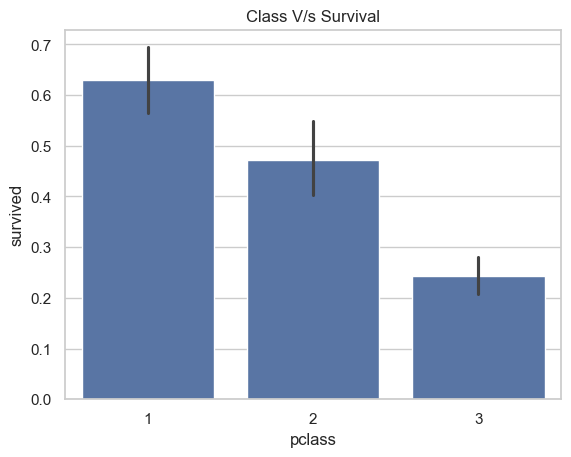

In [103]:
#Class V/s Survival
sns.barplot(x='pclass', y='survived', data=train)
plt.title("Class V/s Survival")
plt.show()

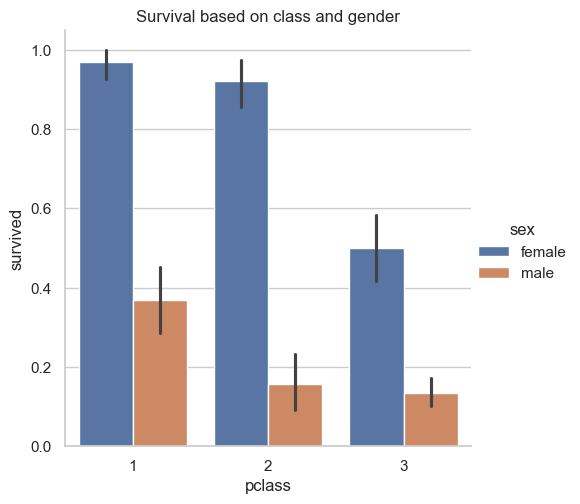

In [104]:
# Survival based on class + gender
sns.catplot(x='pclass', y='survived',hue='sex', data=train, kind='bar')
plt.title("Survival based on class and gender")
plt.show()

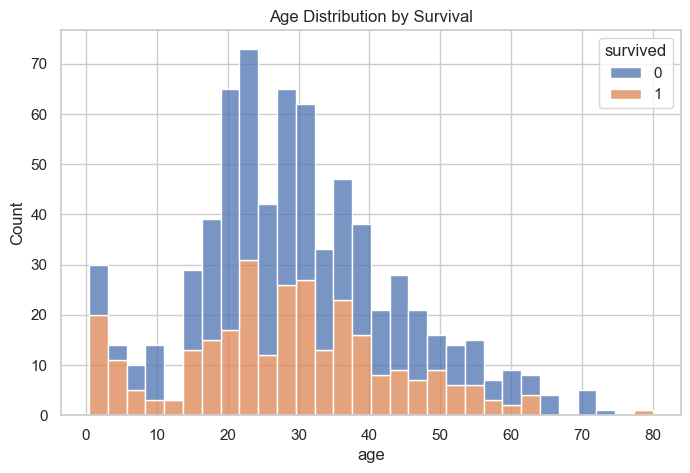

In [105]:
#Baby's and children survival rate
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='age', hue='survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()

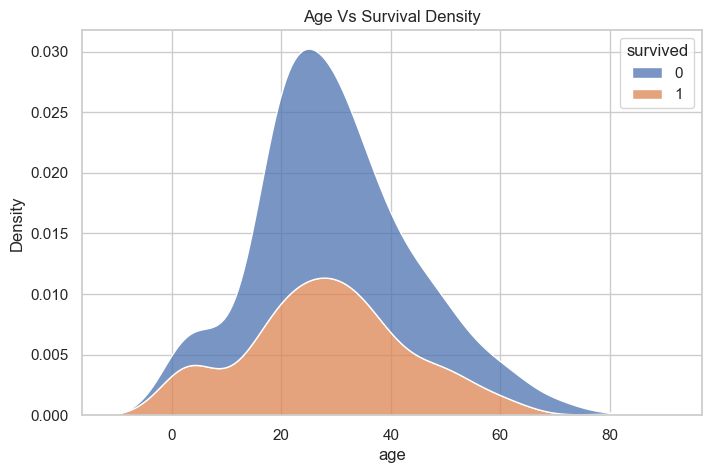

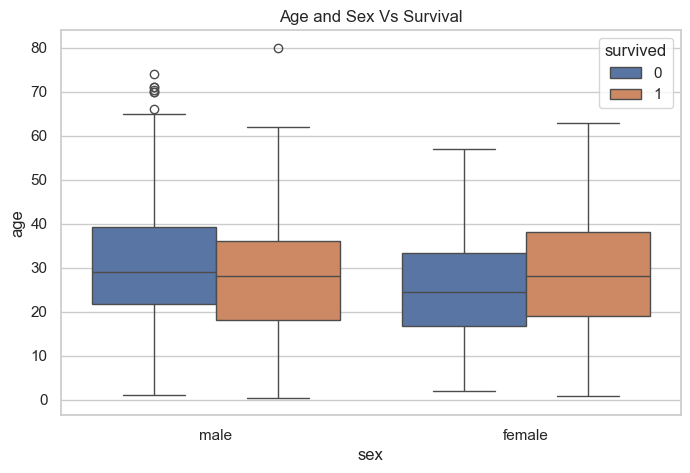

In [106]:
#Sex + Age
plt.figure(figsize=(8,5))
sns.kdeplot(data=train, x='age', hue='survived', multiple='stack')
plt.title("Age Vs Survival Density")
plt.figure(figsize=(8,5))
sns.boxplot(data=train, x='sex', y='age', hue='survived')
plt.title("Age and Sex Vs Survival")
plt.show()

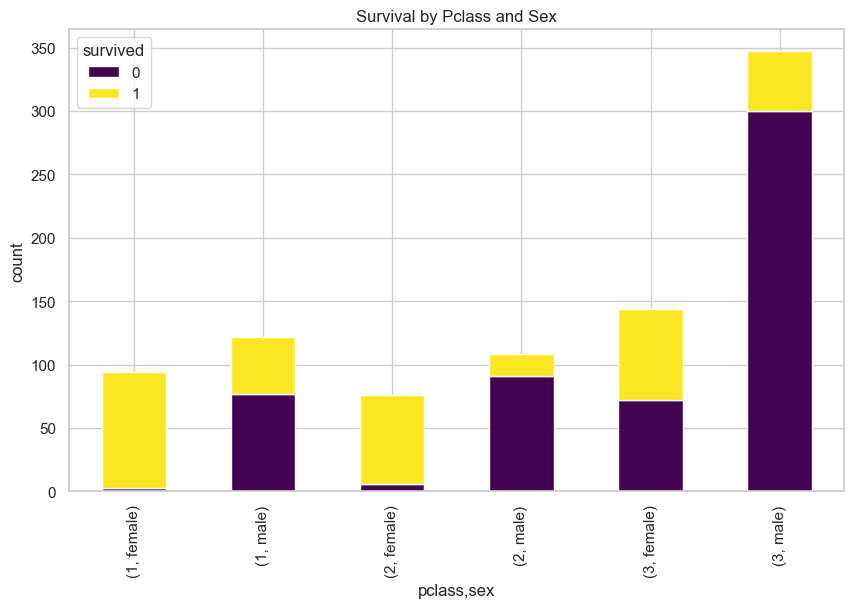

In [107]:
#Pclass and Sex -> Survival
pclass_sex= pd.crosstab([train['pclass'], train['sex']], train['survived'])
pclass_sex.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Survival by Pclass and Sex")
plt.ylabel('count')
plt.show()

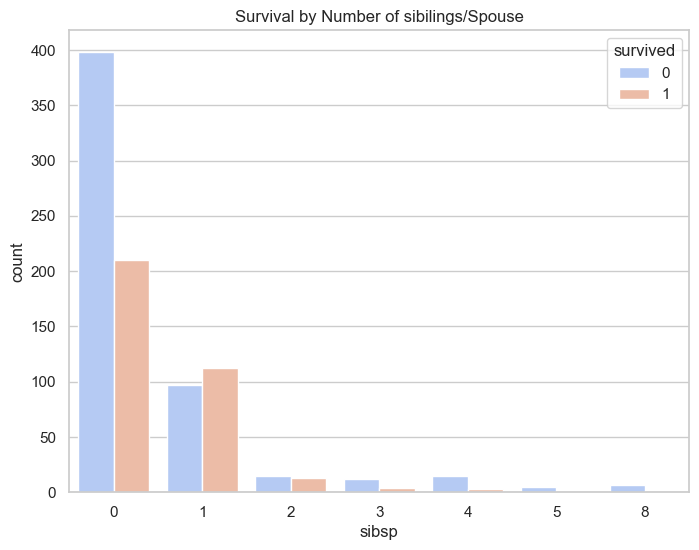

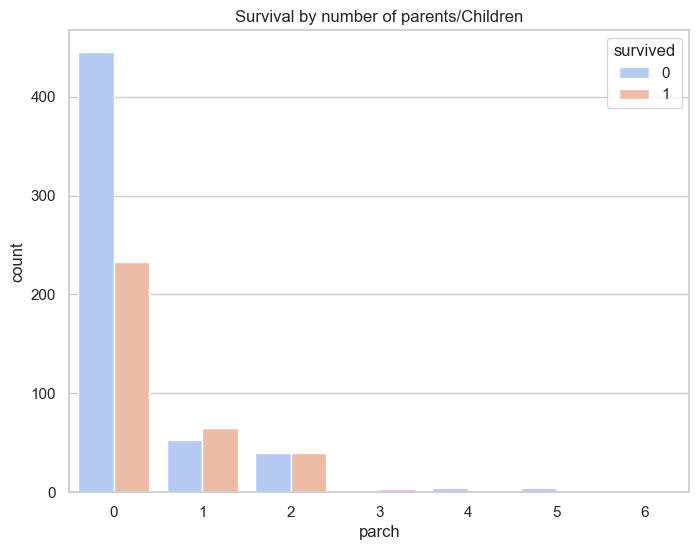

In [108]:
#Survival based on family (spouces or family members)
plt.figure(figsize=(8,6))
sns.countplot(x='sibsp', hue='survived', data=train, palette='coolwarm')
plt.title("Survival by Number of sibilings/Spouse")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='parch', hue='survived', data=train, palette='coolwarm')
plt.title("Survival by number of parents/Children")
plt.show()

Day 2: Data Cleaning and Preprocessing
---

In [109]:
#printing first 5 rows
print(train.head())

#checking any null value
print(train.isnull().sum())

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0

In [110]:
train['age'] = train.groupby(['sex','pclass'])['age'].transform(lambda x: x.fillna(x.median()))

In [111]:
train['has_cabin'] = train['cabin'].notna().astype(int)
train.drop(columns=['cabin'],inplace=True)

In [112]:
print(train.head())
print(train['embarked'].value_counts())

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare embarked  has_cabin  
0    male  22.0      1      0         A/5 21171   7.2500        S          0  
1  female  38.0      1      0          PC 17599  71.2833        C          1  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S          0  
3  female  35.0      1      0            113803  53.1000        S          1  
4    male  35.0      0      0            373450   8.0500        S          0  
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [113]:
#Embarked
train['embarked'].fillna(train['embarked'].mode()[0],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14472\2057701206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['embarked'].fillna(train['embarked'].mode()[0],inplace=True)


In [114]:
#when fare value is missing
#train['fare'].fillna(train['fare'].median(),inplace=True)

Encoding Categorical Features
---

In [115]:
# sex -> numeric
train['sex'] = train['sex'].map({'male':0, 'female':1})

In [116]:
#embarked -> one-hot encoding
train = pd.get_dummies(train,columns=['embarked'], drop_first=True)

In [117]:
print(train.head())

   survived  pclass                                               name  sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    age  sibsp  parch            ticket     fare  has_cabin  embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500          0       False   
1  38.0      1      0          PC 17599  71.2833          1       False   
2  26.0      0      0  STON/O2. 3101282   7.9250          0       False   
3  35.0      1      0            113803  53.1000          1       False   
4  35.0      0      0            373450   8.0500          0       False   

   embarked_S  
0        True  
1       False  
2        True  
3        T

Feature Engineering
---

In [118]:
train['title'] = train['name'].str.extract('([A-Za-z]+)\.', expand=False)


#simplify rare titles
train['title'] = train['title'].replace(
    ['Lady', 'Countness','Capt','Col','Don', 'Dr',
     'Major','Rev','Sir','Jonkheer','Dona'],'rare'
)
train['title'] = train['title'].replace({'Mile': 'Miss', 'Ms':'Miss', 'Mme': 'Mcs'})

In [119]:
#Family Size

train['family_size'] = train['sibsp'] + train['parch'] +1
print(train.head())

   survived  pclass                                               name  sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    age  sibsp  parch            ticket     fare  has_cabin  embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500          0       False   
1  38.0      1      0          PC 17599  71.2833          1       False   
2  26.0      0      0  STON/O2. 3101282   7.9250          0       False   
3  35.0      1      0            113803  53.1000          1       False   
4  35.0      0      0            373450   8.0500          0       False   

   embarked_S title  family_size  
0        True    Mr            2  
1   

In [120]:
#peoples travelling alone (true= 1 & false =0)
train['alone']= (train['family_size'] ==1).astype(int)
print(train.head())

   survived  pclass                                               name  sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    age  sibsp  parch            ticket     fare  has_cabin  embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500          0       False   
1  38.0      1      0          PC 17599  71.2833          1       False   
2  26.0      0      0  STON/O2. 3101282   7.9250          0       False   
3  35.0      1      0            113803  53.1000          1       False   
4  35.0      0      0            373450   8.0500          0       False   

   embarked_S title  family_size  alone  
0        True    Mr            2

In [121]:
train['age_band'] = pd.cut(train['age'],5)
print(train['age_band'].head())

0    (16.336, 32.252]
1    (32.252, 48.168]
2    (16.336, 32.252]
3    (32.252, 48.168]
4    (32.252, 48.168]
Name: age_band, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]


Day 3: Exploratory Visualization & Feature Insights
----

In [122]:
sns.set(style='whitegrid')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14472\1597599727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='age_band', y ='survived', palette='Set2')


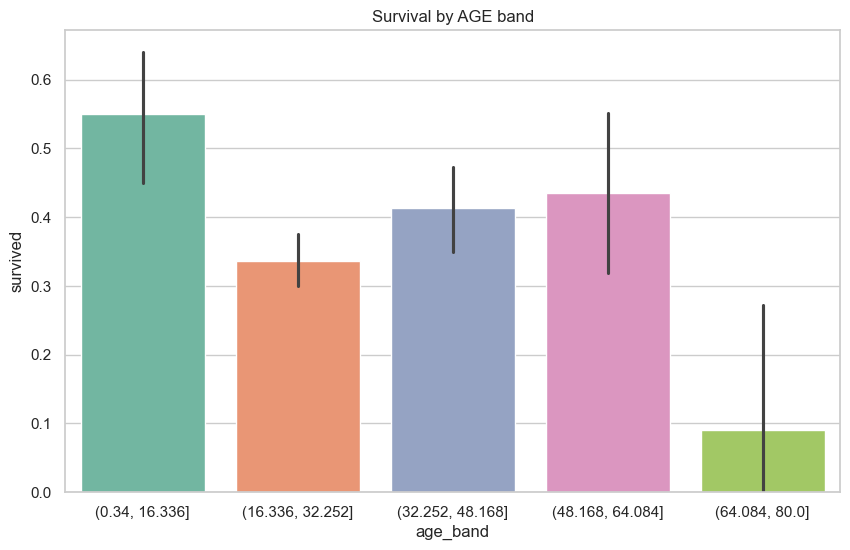

In [123]:
#Survival by AGE band
plt.figure(figsize=(10,6))
sns.barplot(data=train, x='age_band', y ='survived', palette='Set2')
plt.title('Survival by AGE band')
plt.show()

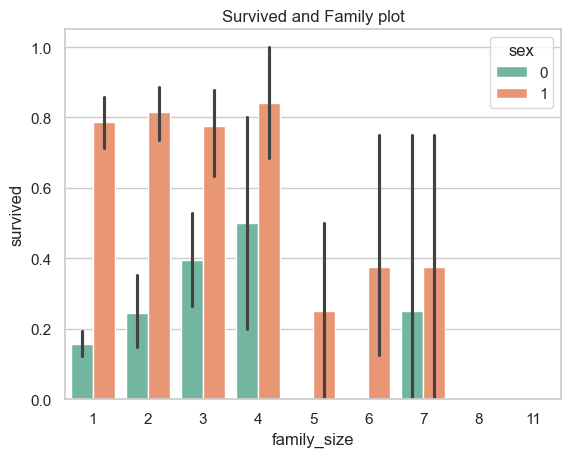

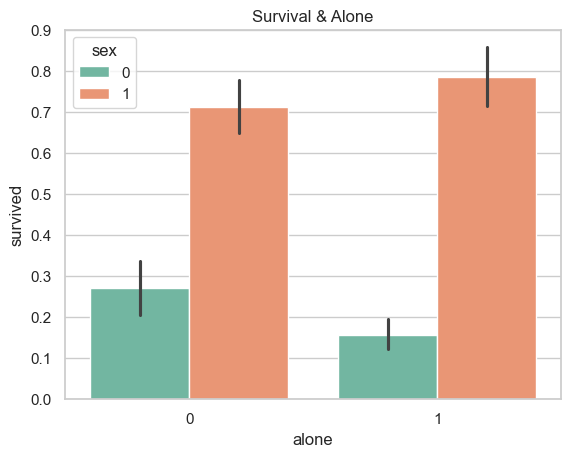

In [124]:
#Family size and is alone
sns.barplot(data=train, x='family_size', y='survived', hue='sex', palette='Set2')
plt.title('Survived and Family plot')
plt.show()

sns.barplot(data=train, x='alone', y ='survived',hue='sex', palette='Set2')
plt.title('Survival & Alone')
plt.show()

Day 4
---

In [125]:
#title_mapping
title_mapping = {'Mr': 0, 'Miss':1, 'Mrs':2, 'Master':3, 'rare':4}
train['title']= train['title'].map(title_mapping)

#Dropping unnecessary columns from the dataset
print(train.columns)
drop_columns = ['name','ticket','age_band','title']
train.drop(columns=drop_columns, inplace=True)

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'has_cabin', 'embarked_Q', 'embarked_S', 'title', 'family_size',
       'alone', 'age_band'],
      dtype='object')


In [126]:
print(train.columns)
print('\n')
print(train.head())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'has_cabin', 'embarked_Q', 'embarked_S', 'family_size', 'alone'],
      dtype='object')


   survived  pclass  sex   age  sibsp  parch     fare  has_cabin  embarked_Q  \
0         0       3    0  22.0      1      0   7.2500          0       False   
1         1       1    1  38.0      1      0  71.2833          1       False   
2         1       3    1  26.0      0      0   7.9250          0       False   
3         1       1    1  35.0      1      0  53.1000          1       False   
4         0       3    0  35.0      0      0   8.0500          0       False   

   embarked_S  family_size  alone  
0        True            2      0  
1       False            2      0  
2        True            1      1  
3        True            2      0  
4        True            1      1  


In [127]:
#Spliting the dataset
X = train.drop('survived', axis=1)
y = train['survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42,stratify=y)

ML Model Applications
---

(LogisticRegression, Decision Tree, Random Forest, Support Vectore Machine(SVM), k-nearest Neighbours(KNN), Gradient Boosting)

Logistic Regression
---

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Train logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train,y_train)

#Prediction
y_pred_lr = log_reg.predict(X_test)

#Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('\nClassification Report:\n', classification_report(y_test,y_pred_lr))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_pred_lr))

Accuracy:  0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[96 14]
 [21 48]]


Decission Tree Classifier
---

In [131]:
#Decission Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('\nClassification Report:\n', classification_report(y_test,y_pred_dt))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_pred_dt))

Accuracy:  0.7821229050279329

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      0.72      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
 [[90 20]
 [19 50]]
